<center> <span style="color:indigo">Machine Learning e Inferencia Bayesiana</span> </center> 

<div style="text-align: center;">
<img src="../Imagenes/CUGDL_logo.png" alt="Drawing" style="width: 800px;"/>
</div>

<center> <span style="color:DarkBlue">  Tema 7. Árboles de Decisión: Introducción </span>  </center>
<center> <span style="color:Blue"> Profesor: M. en C. Iván A. Toledano Juárez </span>  </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

%matplotlib inline

In [9]:
data = pd.read_csv('Datasets/Cosecha.csv')
data

,Lugar,Lluvia,Terreno,Fertilizantes,Agua_subterranea,Cosecha
0,P1,Altas,Llanura,Si,Si,Optima
1,P2,Bajas,Colinas,No,Si,Pobre
2,P3,Bajas,Meseta,No,Si,Moderada
3,P4,Altas,Meseta,No,Si,Moderada
4,P5,Altas,Llanura,Si,No,Optima
5,P6,Bajas,Colinas,No,No,Pobre
6,P7,Bajas,Meseta,No,No,Pobre
7,P8,Medias,Meseta,No,No,Pobre
8,P9,Altas,Colinas,Si,Si,Moderada
9,P10,Medias,Meseta,Si,Si,Optima


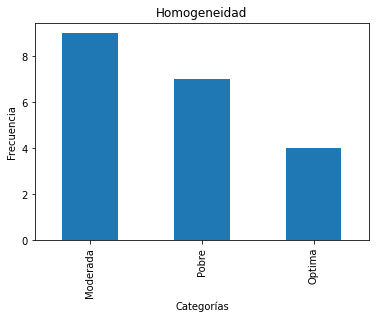

In [19]:
data_cosecha = data['Cosecha'].value_counts().to_frame()
data_cosecha['Cosecha'].plot(kind='bar')

plt.title('Homogeneidad')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

plt.savefig('Plots/Homogeneidad.pdf', bbox_inches='tight')
plt.show()

In [39]:
table_lluvia = pd.crosstab(data.Lluvia, data.Cosecha)
table_lluvia

Cosecha,Moderada,Optima,Pobre
Lluvia,,,
Altas,4,3,0
Bajas,2,0,5
Medias,3,1,2


In [40]:
table_terreno = pd.crosstab(data.Terreno, data.Cosecha)
table_terreno

Cosecha,Moderada,Optima,Pobre
Terreno,,,
Colinas,3,0,3
Llanura,3,2,1
Meseta,3,2,3


In [41]:
table_fertilizantes = pd.crosstab(data.Fertilizantes, data.Cosecha)
table_fertilizantes

Cosecha,Moderada,Optima,Pobre
Fertilizantes,,,
No,3,0,6
Si,6,4,1


In [42]:
table_agua = pd.crosstab(data.Agua_subterranea, data.Cosecha)
table_agua

Cosecha,Moderada,Optima,Pobre
Agua_subterranea,,,
No,3,2,6
Si,6,2,1


## Entropía

In [35]:
def entropy(n,pi):
    sumatoria = 0
    pi_list = []
    pi_list.append(pi)
    pi_list.append(1-pi)
    for element in pi_list:
        sumatoria += -element * np.log2(element)
    return sumatoria

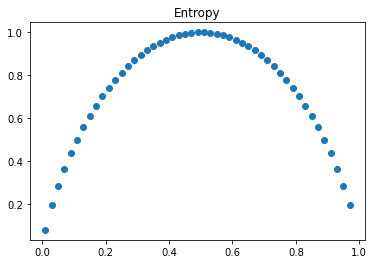

In [38]:
x = np.arange(0.01,0.99,0.02)
plt.scatter(x,entropy(2,x))
plt.title('Entropy')
plt.savefig('Plots/Entropy.pdf', bbox_inches='tight')
plt.show()

In [100]:
def H(p):
    res = p * np.log2(p)
    return res

def entropia(table):
    suma_total = 0
    for index in table.index:
        sumatoria = 0
        for column in table.columns:
            if table[column][index] == 0:
                sumatoria += 0
            else:
                sumatoria += -H(table[column][index]/table.sum(axis=1)[index])
        print('H(T=',index,') = ',sumatoria)
        suma_total += (sumatoria*table.sum(axis=1)[index]/table.sum().sum())
    print('total =',suma_total)
    return suma_total

In [101]:
1.5 - entropia(table_terreno)

H(T= Colinas ) =  1.0
H(T= Llanura ) =  1.4591479170272448
H(T= Meseta ) =  1.561278124459133
total = 1.3622556248918265


0.1377443751081735

In [103]:
1.5 - entropia(table_agua)

H(T= No ) =  1.4353713907745331
H(T= Si ) =  1.224394445405986
total = 1.340431765358687


0.15956823464131298

In [104]:
1.5 - entropia(table_fertilizantes)

H(T= No ) =  0.9182958340544896
H(T= Si ) =  1.3221793455166666
total = 1.140431765358687


0.35956823464131293

In [105]:
1.5 - entropia(table_lluvia)

H(T= Altas ) =  0.9852281360342515
H(T= Bajas ) =  0.863120568566631
H(T= Medias ) =  1.4591479170272446
total = 1.0846664217184823


0.41533357828151773